# Imports

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
path = "/content/drive/MyDrive/Aprendizagem de Máquina/lab1_spotify"

Sample submission

In [3]:
pd.read_csv(f"{path}/spotify_sample_submission.csv").head()

,id,popularity
0,6IfByzdeGt3iIsakTp16vz,25.915539
1,17TO3XH1slhDyqnwypne06,25.915539
2,5chxjST0MfWZPsaHrWgiqe,25.915539
3,4Db6PxFIiK1a6nCEJABTHk,25.915539
4,3MPKTMJIxlORqcxw542HHK,25.915539


Read train dataframe

In [4]:
train_df = pd.read_csv(f"{path}/train.csv")

# EDA

## Null values

Não há valores nulos

In [6]:
train_df.isnull().values.any()

False

## Correlations



1.   year

> não possui correlação forte com ninguém além dele mesmo

>  possui correlação negativa moderada com acousticness, e positiva moderada com energy e loudness.

> possui correlação positiva fraca com danceability, duration_ms, explicit, key e tempo, e possui correlação negativa fraca com o restante das variáveis preditoras

> correlação moderada positiva com a variável alvo popularity

> O ano em que a musica foi lançada não aparenta impactar muito na popularidade.

2.   acousticness

> possui correlação negativa forte com energy, nenhuma correlação positiva forte além dele mesmo.

> possui correlação negativa moderada com loudness, e positiva moderada com nenhuma.

> possui correlação positiva fraca com instrumentalness e mode, e negativa fraca com o restante (exceto o alvo)

> Possui correlação negativa moderada com popularity

> Músicas acústicas aparentam ser menos energéticas e menos "barulhentas", e aparentam ser menos populares também

3. danceability

> Não há nenhuma correlação forte, exceto com ela mesma

> Correlação positiva moderada com valence

> Fracamente correlacionada a todas as outras variáveis

> Correlação positiva fraca com popularidade

> As músicas mais "dançantes" aparentam são mais alegres, dado a correlação positiva moderada com valence. E que músicas populares não necessariamente são dançantes.

4. duration_ms

> Todas as correlações são fracas, inclusive com a variável alvo popularity.

> Músicas mais longas ou mais curtas não tem muito a ver com popularidade.

5. energy

> correlação positiva forte com loudness, e não há negativa forte.

> Todas as outras correlações são fracas

> Músicas mais energeticas estatisticamente são mais "barulhentas", e isso não aparenta impactar muito na popularidade

6. explicit

> Todas as correlações são fracas

> músicas com conteúdo explicito não aparentam impactar muito na popularidade ou em variável nenhuma.

7. instrumentalness

> Todas as correlações são fracas

> músicas com mais instrumental não aparentam impactar muito em nenhuma variável e nem na popularidade

8. key

> Todas as correlação são muito fracas

> Essa variável não aparenta impactar em nada

9. liveness

> Todas as correlação são muito fracas

> Essa variável não aparenta impactar em nada

10. loudness

> Além das variáveis que já foram mencionadas anteriormente, nenhuma correlação forte

> A correlação de loudness com popularity é razoavelmente fraca

> Loudness nao aparenta impactar muito na popularidade

11. mode

> Todas as correlação são fracas

> Essa variável não aparenta impactar em nada

12. speechiness

> Todas as correlação são fracas

> Essa variável não aparenta impactar em nada

13. tempo

> Todas as correlação são fracas

> Essa variável não aparenta impactar em nada

14. valence

> Todas as correlação são fracas, exceto danceability que é positiva e moderada como ja mencionado

> Essa variável não aparenta impactar na popularidade, e músicas mais alegres aparentam serem mais dançantes como ja dito.

15. popularity

> Tudo sobre popularidade já foi falado anteriormente.

<ipython-input-9-0ce5ff7881f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = train_df.drop(columns=["id"]).corr()


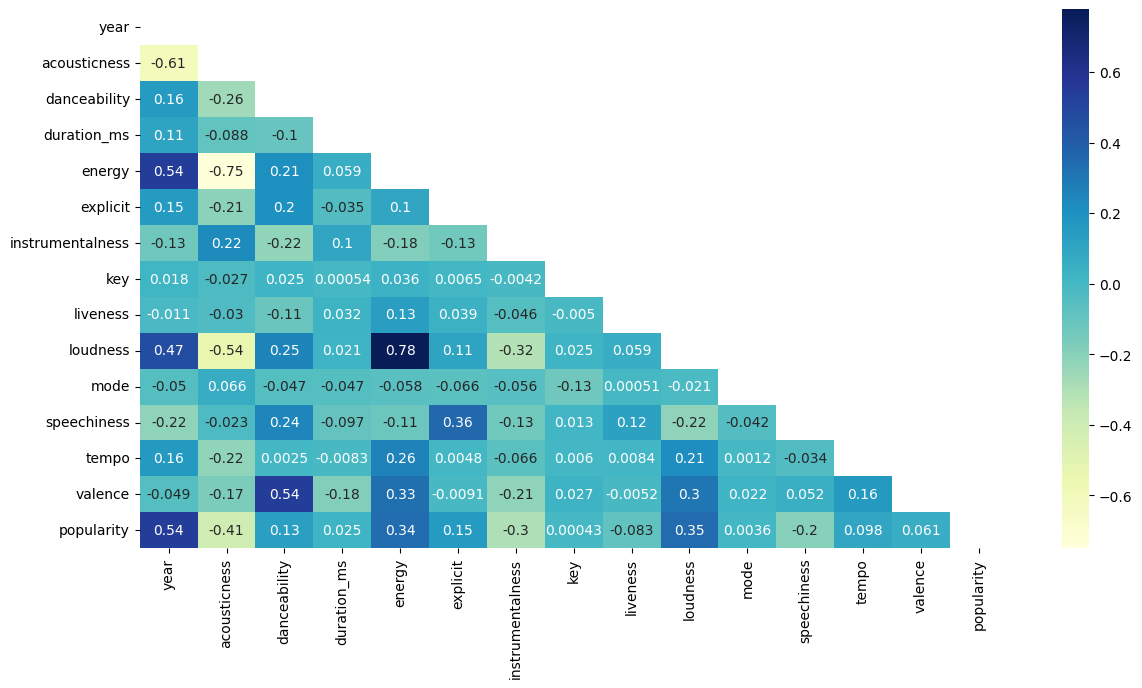

In [9]:
corr_data = train_df.drop(columns=["id"]).corr()

plt.figure(figsize=(14,7))

# creating mask
mask = np.triu(np.ones_like(corr_data))

# plotting a triangle correlation heatmap
dataplot = sns.heatmap(corr_data, cmap="YlGnBu", annot=True, mask=mask)

# displaying heatmap
plt.show()

## Check the distributions

1. year
> Começando em 1920 com umas 400 musicas, tem uma tendência de crescimento até os anos 50.
> Entre 1950 e 2000 apresenta uma distribuição quase uniforme.
> Após 2000, apresenta uma tendência de queda e depois volta a subir por volta de 2010.

2. accousticness
> A distribuição dessa variável apresenta um formato de parábola pra cima, pois há muitos dados com accousticness igual a 0 e a 1, e uma quantidade bem menor com valores entre 0 e 1.

3. danceability
> Segue distribuição normal com média aproximadamente 0.5

4. durantion_ms
> Segue distribuição normal com forte assimetria à esquerda. Essa distribuição deve ser investigada mais a fundo.

5. energy
>

6. explicit
> Há muito mais 0 (falso) do que 1 (verdadeiro)

7. instrumentalness
> A grande maioria dos dados tem valor entre 0 e 0.1 nessa variável, uma pequena quantidade está entre 0.8 e 1.

8. key
> Tem uma distribuição moderadamente uniforme entre todos os valores de key no geral, porém os valores (0,2,7,9) se destacam.

9. liveness
> Distribuição normal com forte assimetria à esquerda, com média em torno de 0.1

10. loudness
> Distribuição normal com forte assimetria à direita, com média em torno de -10

11. mode
> Aproximadamente 70% das músicas tem mode = 1 (músicas mais felizes)

12. speechiness
> Distribuição normal com forte assimetria à esquerda, com média em torno de 0.1

13. tempo
> Distribuição quase normal com média em torno de 130....

14. valence
> Distribuição similar à energy....

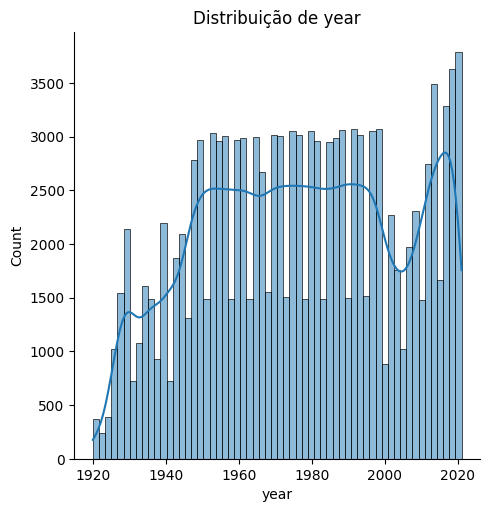

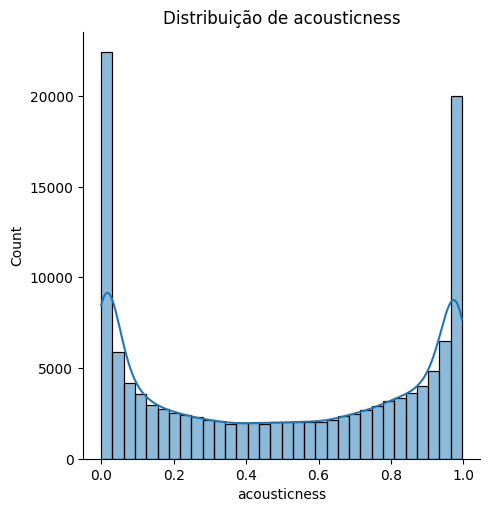

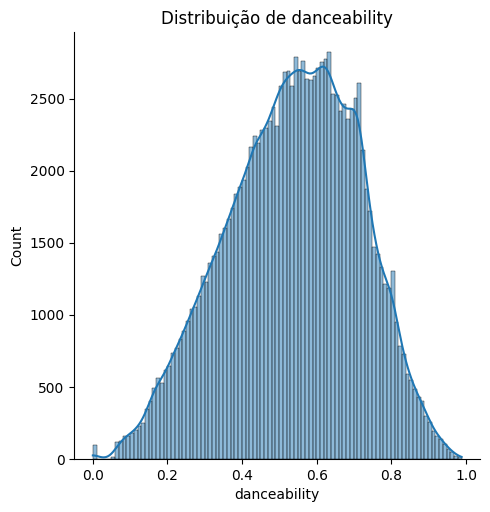

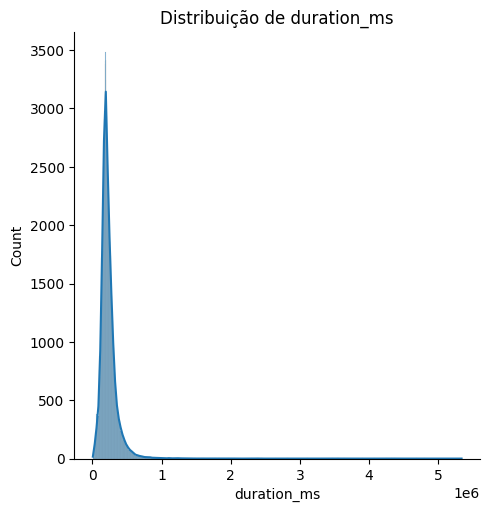

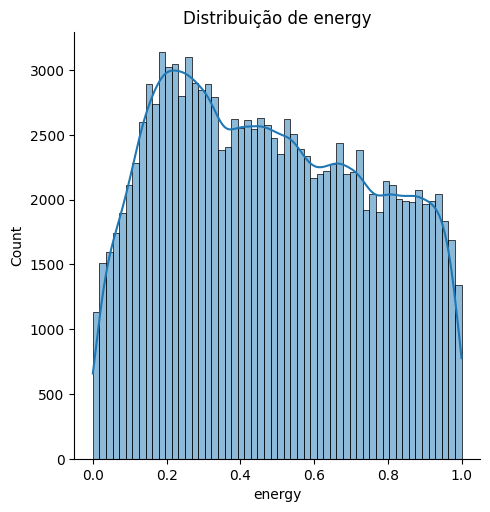

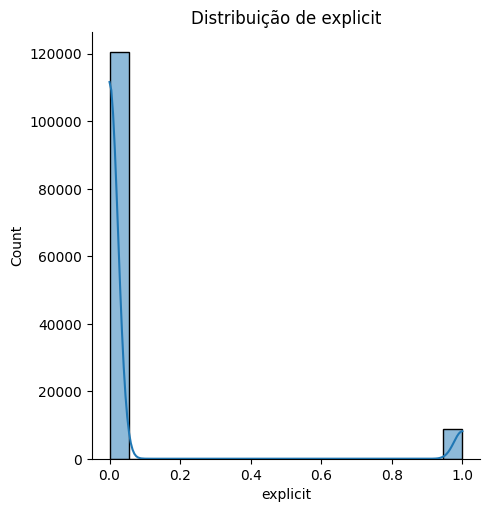

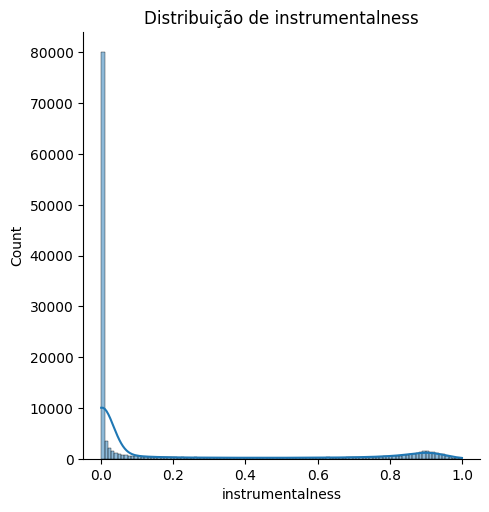

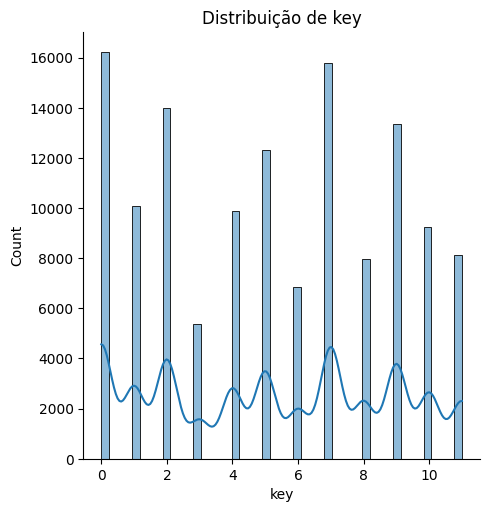

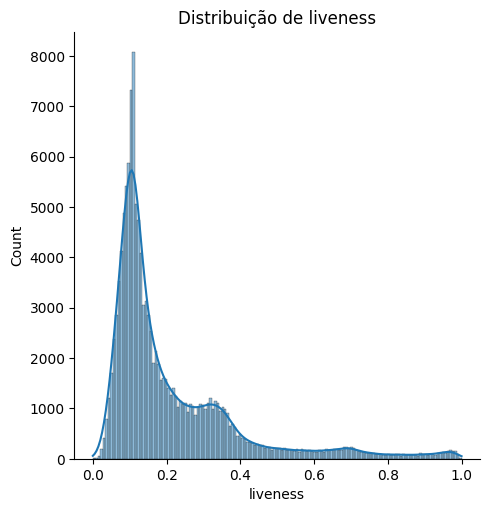

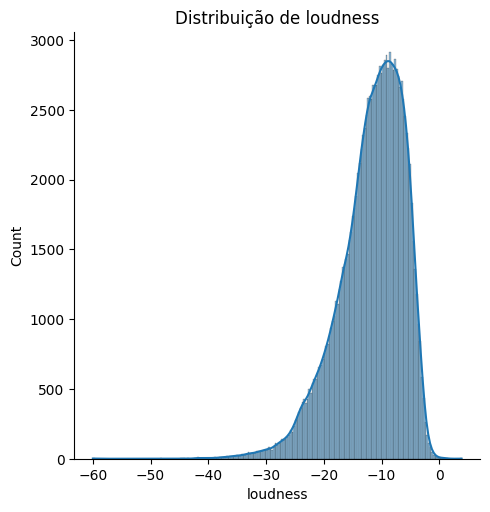

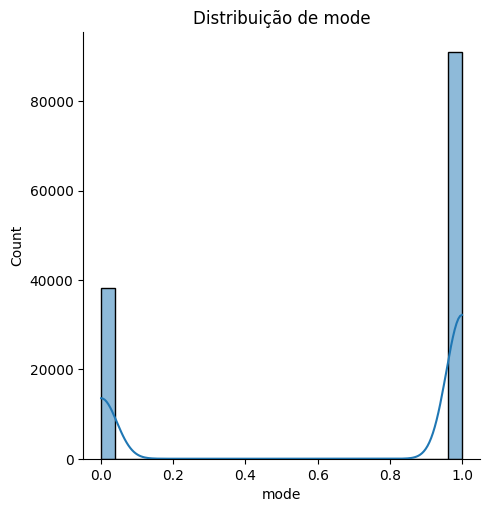

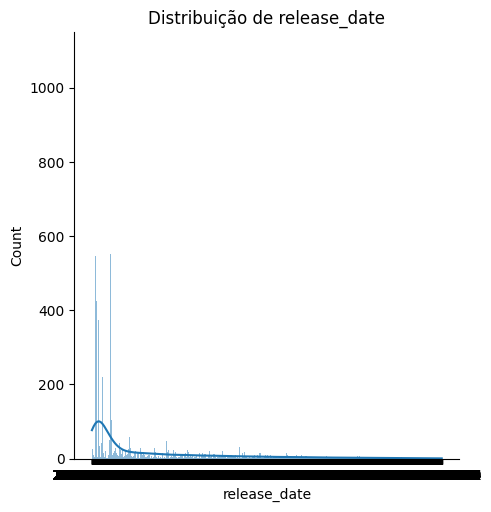

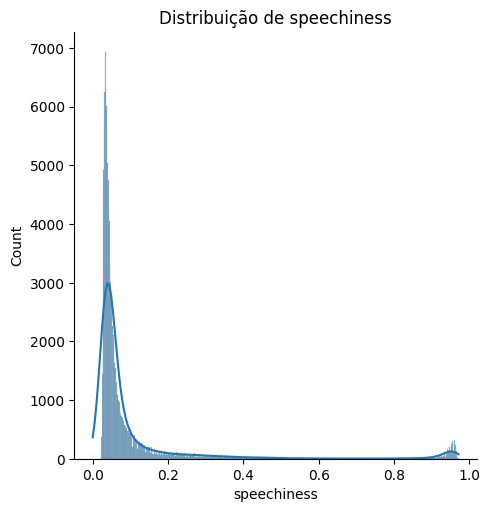

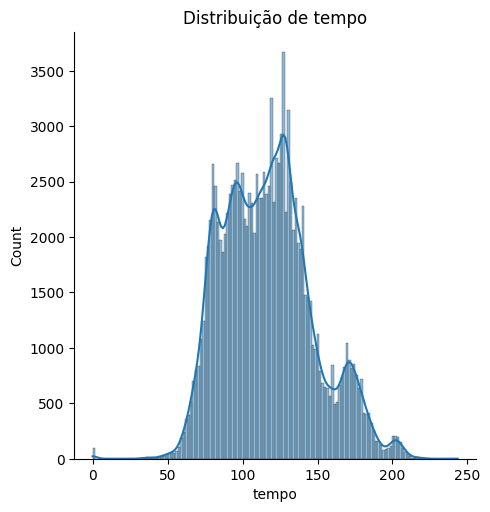

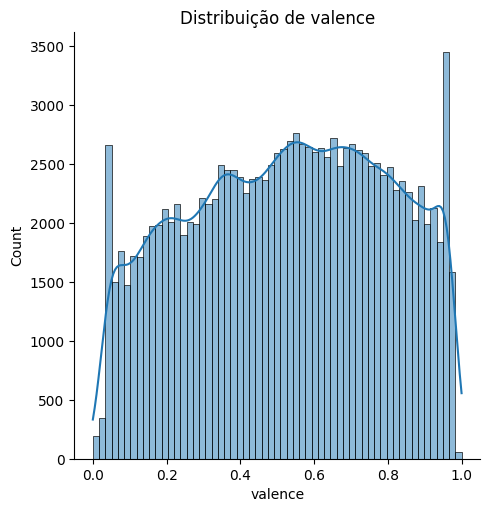

In [15]:
cols = train_df.drop(['id','popularity', 'artists', 'name', 'release_date'], axis=1).columns

for col in cols:
  sns.displot(train_df, x=col, kde=True)
  plt.title(f"Distribuição de {col}")
  plt.show()

# Linear Regression

variável escolhida: energy

> Justificativa: Apesar da correlaçao média/baixa com popularity no conjunto de treinamento, os dados estão bem distribuidos entre todos os valores de energy, sendo os valores das extremidades (0,1) com menor frequência, e os valores intermediários com maior frequência.

o peso do atributo é o coef_


In [11]:
X = train_df["energy"].values.reshape(-1, 1)
y = train_df["popularity"].values.reshape(-1, 1)
linear_regr = LinearRegression()

In [12]:
linear_regr.fit(X, y)

LinearRegression()

In [13]:
linear_regr.coef_

array([[27.38673252]])

In [14]:
linear_regr.intercept_

array([12.73987998])

In [15]:
y_pred = linear_regr.predict(X)

In [16]:
rmse = mean_squared_error(y, y_pred, squared=False)
rmse

20.571161650532

In [32]:
X.shape

(129172, 1)

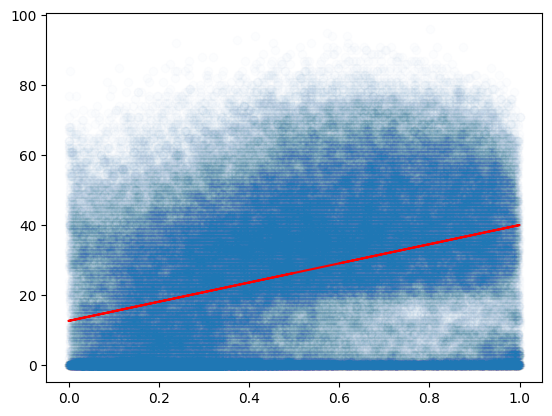

In [44]:
plt.scatter(X, y, alpha=0.01)
plt.plot(X, y_pred, color='r')
plt.show()

## Resposta:

> O RMSE foi de 20, quer dizer que esse modelo erra a predição em média por 20 pontos de popularidade. Esse erro é muito alto, significa que o modelo não está adequado.

Com coeficiente (peso) de 27.4 e intercept de 12.7, significa que a cada ponto de accousticness a popularidade sobe 27.4, e para accousticness = 0, popularidade seria 12.7



# Multi linear regression

In [5]:
X = train_df[["year", "acousticness", "energy"]].values.reshape(-1, 3)
y = train_df["popularity"].values.reshape(-1, 1)
multi_lin_reg = LinearRegression()

In [6]:
multi_lin_reg.fit(X,y)

LinearRegression()

In [7]:
y_pred = multi_lin_reg.predict(X)

In [8]:
rmse = mean_squared_error(y, y_pred, squared=False)
rmse

18.274492565676198

In [10]:
print("year", "acousticness", "energy")
multi_lin_reg.coef_

year acousticness energy


array([[ 0.38225948, -7.6996085 , -1.13565974]])

In [12]:
multi_lin_reg.intercept_

array([-725.23963037])

## Resposta

Intercept:

>O intercept está bem maior em módulo que o valor anterior. Com muitas variáveis a interpretação fica confusa.

Coeficiente:

>Year tem o menor peso na predição de popularidade. Accousticness tem o maior peso. Analisando somente esses coeficientes pode-se interpretar que músicas mais recentes, com pouca acústica e com menos energia são mais populares.

Erro:

>O erro agora está um pouco menor que o erro anterior, mas ainda não é bom.

# Other types of regression

## Normalize data

In [15]:
scaler = StandardScaler()

In [17]:
x_columns = ["year","acousticness","danceability","duration_ms","energy","explicit","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","valence"]
X = train_df[x_columns]
y = train_df['popularity']

In [18]:
X = scaler.fit_transform(X)

## Define aux functions

In [20]:
# Calcula o RMSE usando cross_validation
from sklearn.model_selection import cross_val_score

def rmse_cv(model, X, Y):
    rmse = np.sqrt(-cross_val_score(model,X,Y,scoring="neg_mean_squared_error",cv=10))
    return (rmse)

In [22]:
# def print_coefficients(model):
#     # Retorna o grau do polinômio
#     deg = len(model.steps[2][1].coef_)-1
#     # Obtém os parâmetros estimados
#     w = list(model.steps[2][1].coef_) #model.steps é usado pois o modelo é calculado usando make_pipile do scikit learn
#     # Numpy tem uma função para imprimir o polinômio mas os parâmetros precisam estar na ordem inversa
#     print ('Polinômio estimado para grau ' + str(deg) + ':')
#     w.reverse()
#     print (np.poly1d(w)+model.steps[2][1].intercept_)

In [23]:
# def print_poly_predictions(X,Y, model):
#     plot_data(X,Y)
#     x_plot = np.array([i/200.0 for i in range(200)])
#     X_plot = x_plot[:,np.newaxis]
#     y_pred = model.predict(X_plot)
#     plt.plot(x_plot,y_pred,'g-')
#     plt.axis([0,1,-1.5,2])

In [24]:
def plot_data(X,Y):
    plt.plot(X,Y,'k.')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([0,1,-1.5,2])

## Ridge CV

Text(0, 0.5, 'rmse')

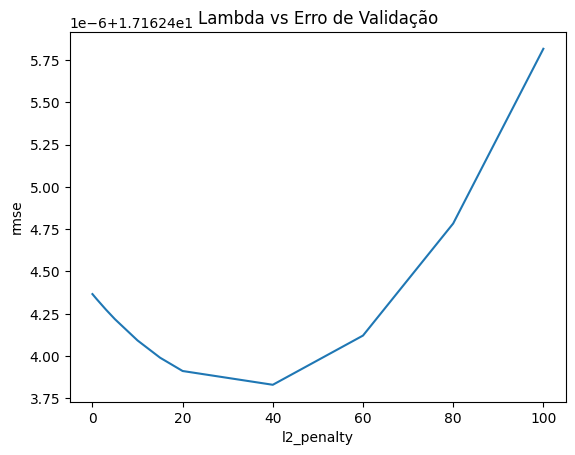

In [26]:
l2_penalties = [0.001,0.01,0.1,0.3,0.5,1,3,5,10,15,20,40,60,80,100]
cv_ridge = [rmse_cv(Ridge(alpha=l2_penalty), X, y).mean()
            for l2_penalty in l2_penalties]
cv_ridge = pd.Series(cv_ridge, index=l2_penalties)
cv_ridge.plot(title="Lambda vs Erro de Validação")
plt.xlabel("l2_penalty")
plt.ylabel("rmse")

In [27]:
best_l2_penalty= l2_penalties[cv_ridge.argmin()]
best_rmse = cv_ridge.min()
print (best_l2_penalty, best_rmse)

40 17.16240383011121


## Lasso CV

Text(0, 0.5, 'rmse')

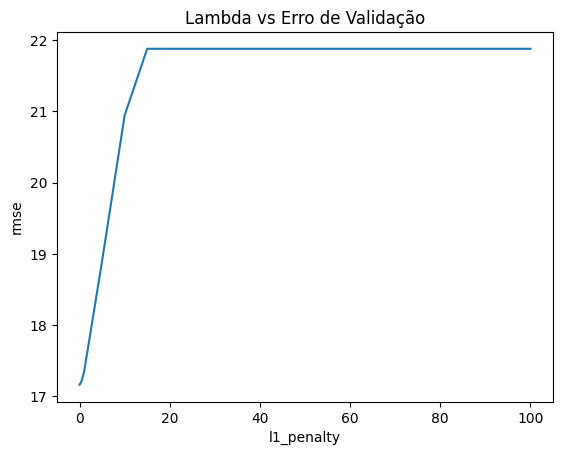

In [29]:
l1_penalties = [0.001,0.01,0.1,0.3,0.5,1,3,5,10,15,20,40,60,80,100]
cv_lasso = [rmse_cv(Lasso(alpha=l1_penalty), X, y).mean()
            for l1_penalty in l1_penalties]
cv_lasso = pd.Series(cv_lasso,index=l1_penalties)
cv_lasso.plot(title="Lambda vs Erro de Validação")
plt.xlabel("l1_penalty")
plt.ylabel("rmse")

In [30]:
best_l1_penalty= l1_penalties[cv_lasso.argmin()]
best_rmse = cv_lasso.min()
print (best_l1_penalty, best_rmse)

0.001 17.162405837866814
